In [4]:
library("randomForest")#分析用パッケージ
library("inTrees")#結果出力用のパッケージ

Warning message:
"package 'inTrees' was built under R version 3.4.2"

In [5]:
num_train<-sample(nrow(iris),100)#学習用データをサンプリング
num_test <-sample(nrow(iris),50)#テスト用データをサンプリング

In [6]:
train_iris<-iris[num_train,]
test_iris <-iris[num_test,] #チューニング

mtry = 2  OOB error = 6% 
Searching left ...
mtry = 1 	OOB error = 6% 
0 0.05 
Searching right ...
mtry = 4 	OOB error = 6% 
0 0.05 


,mtry,OOBError
1.OOB,1,0.06
2.OOB,2,0.06
4.OOB,4,0.06


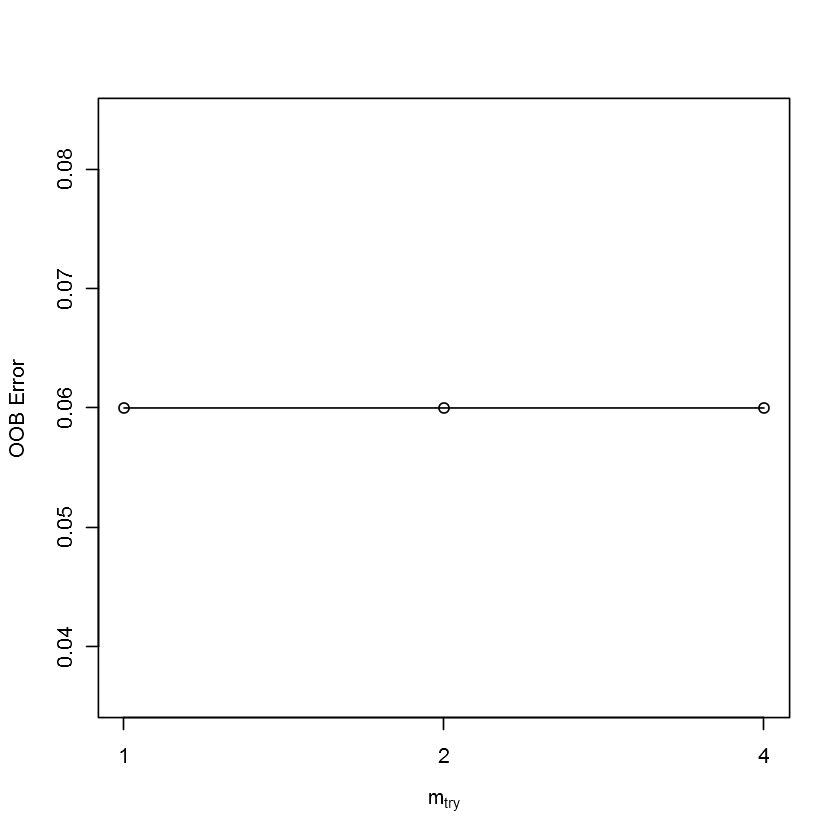

In [8]:
tuneRF(train_iris[,-5],train_iris$Species,plot = TRUE, doBest = FALSE)

In [9]:
rf <- randomForest(Species ~., data=train_iris, mtry=2, ntree = 500, predict.all=TRUE)
#予測・分類器の構築

In [10]:
result <- predict(rf, newdata=test_iris[-5],predict.all=TRUE)
#構築した分類器で、分類対象のデータを分類 

In [12]:
#結果の出力（分類結果の表）#縦軸がテスト用データ、横軸が分析結果
(table(test_iris$Species, result$aggregate)->res)

            
             setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         16         1
  virginica       0          0        20

In [13]:
sum(diag(res)/sum(res))

[1] 0.98

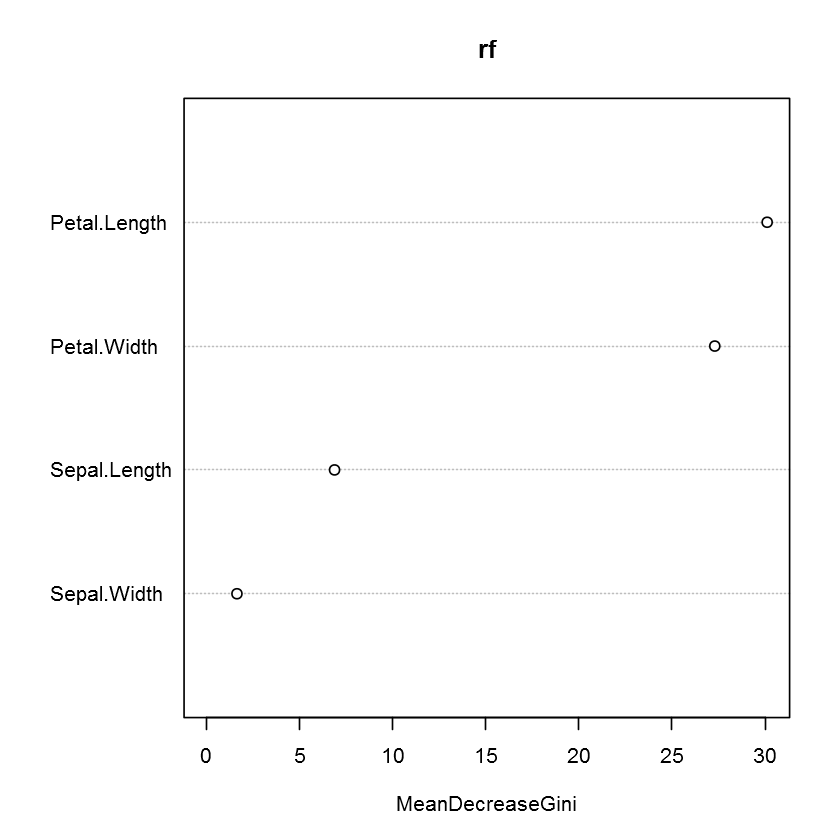

In [14]:
varImpPlot(rf)#重要度のグラフ

In [15]:
rf$importance#重要度をコンソールに出力

,MeanDecreaseGini
Sepal.Length,6.878118
Sepal.Width,1.635344
Petal.Length,30.111724
Petal.Width,27.298014


In [16]:
# 分類ルールを抽出してみる

In [17]:
treeList <- RF2List(rf)
#すべてのtreeの木構造を取得（getTree()する）

In [18]:
exec <- extractRules(treeList,train_iris,ntree=500)
#決定木に含まれる条件文を抽出

3454 rules (length<=6) were extracted from the first 500 trees.


In [19]:
ruleMetric <- getRuleMetric(exec,train_iris,train_iris$Species)
#取り出した条件文を集計

In [20]:
ruleMetric <- pruneRule(ruleMetric,train_iris,train_iris$Species)
#余計な条件を削除

In [21]:
ruleMetric <- selectRuleRRF(ruleMetric,train_iris,train_iris$Species)
#条件文を集約

In [22]:
learner <- buildLearner(ruleMetric,train_iris,train_iris$Species,minFreq=0.01)
#レアな（発生頻度の低い）ルールを切り落とし、1本に集約

In [23]:
readableRules <- presentRules(learner,colnames(train_iris))
#ルールを読みやすく加工

In [24]:
readableRules#結果の表示

len,freq,err,condition,pred
3,0.31,0,Petal.Length>2.6 & Petal.Length<=4.85 & Petal.Width<=1.6,versicolor
3,0.02,0,Sepal.Length<=6.1 & Sepal.Length>5.85 & Petal.Width>1.55,versicolor
1,0.67,0.477611940298508,Else,setosa


In [ ]:
# ランダムフォレストは決定木のようにグラフィカルに表現できないのが欠点ですが、
# これでルールは読み解くことができます。